In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import NullFormatter
from scipy import stats
plt.style.use('ggplot')   
%matplotlib inline

In [2]:
pl_fig = pd.read_csv("plr_fig.csv")


In [3]:
pl_fig.head()

,id,visits,res_sum,res_std,res_mean,hands_sum,hands_std,hands_mean,bets_sum,bets_std,bets_mean
0,520,5,93.225751,27.194432,18.645150,357.0,7.889233,71.40,3715.831390,82.115015,743.166278
1,266,5,-124.944832,90.646382,-24.988966,274.0,11.267653,54.80,2909.112290,119.630903,581.822458
2,526,2,81.132312,50.530011,40.566156,159.0,14.500000,79.50,1626.938609,148.368615,813.469305
3,785,4,1098.498073,285.729773,274.624518,380.0,7.382412,95.00,12998.479473,252.526644,3249.619868
4,786,4,-261.244285,114.909805,-65.311071,257.0,4.437060,64.25,2514.110771,43.405681,628.527693


In [4]:
pl_fig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          100 non-null    int64  
 1   visits      100 non-null    int64  
 2   res_sum     100 non-null    float64
 3   res_std     100 non-null    float64
 4   res_mean    100 non-null    float64
 5   hands_sum   100 non-null    float64
 6   hands_std   100 non-null    float64
 7   hands_mean  100 non-null    float64
 8   bets_sum    100 non-null    float64
 9   bets_std    100 non-null    float64
 10  bets_mean   100 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 8.7 KB


In [5]:
pl_fig.describe()

,id,visits,res_sum,res_std,res_mean,hands_sum,hands_std,hands_mean,bets_sum,bets_std,bets_mean
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,551.370000,6.020000,-247.996529,290.988780,-42.748465,1064.900000,18.960777,181.355657,21953.002400,493.685527,3556.443098
std,267.104589,2.197243,1411.417105,406.263603,247.621938,1001.338533,12.955380,146.083375,28443.412309,828.529418,4000.947357
min,100.000000,1.000000,-4151.557051,0.000000,-691.926175,150.000000,0.000000,18.750000,1626.938609,0.000000,581.822458
25%,327.750000,5.000000,-704.047029,85.127630,-124.446237,408.500000,9.848711,70.275000,4625.862260,111.883110,707.378022
50%,549.500000,6.000000,-204.243292,143.939110,-43.484387,600.000000,13.760129,97.800000,12610.804065,239.699737,3396.604052
75%,806.250000,7.000000,102.978702,279.552916,20.845143,1417.000000,26.995671,377.807143,24603.396571,438.317851,3976.429634
max,986.000000,12.000000,6757.299792,2134.724732,1351.459958,4822.000000,59.425899,464.000000,142536.570772,4524.489901,18470.558596


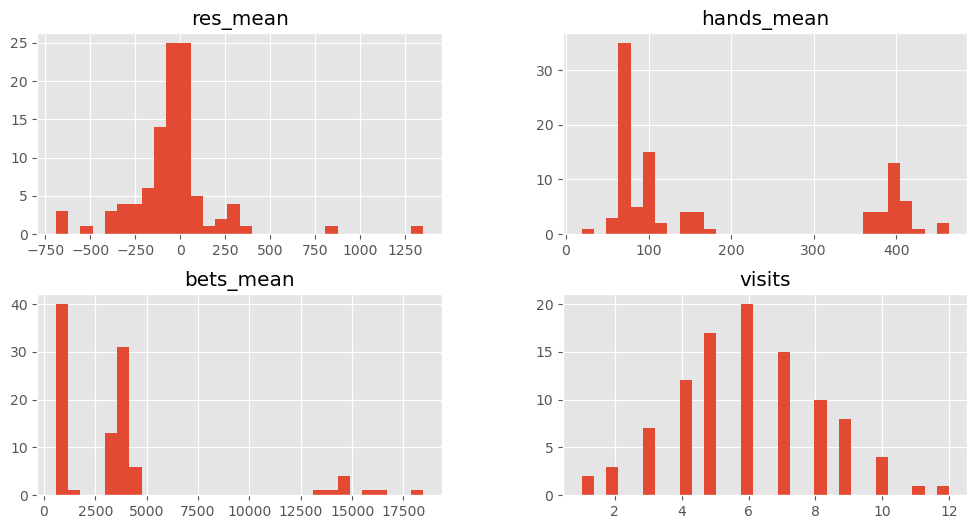

In [6]:
pl_fig[['res_mean','hands_mean','bets_mean', 'visits']].hist(figsize=(12,6), bins=30);

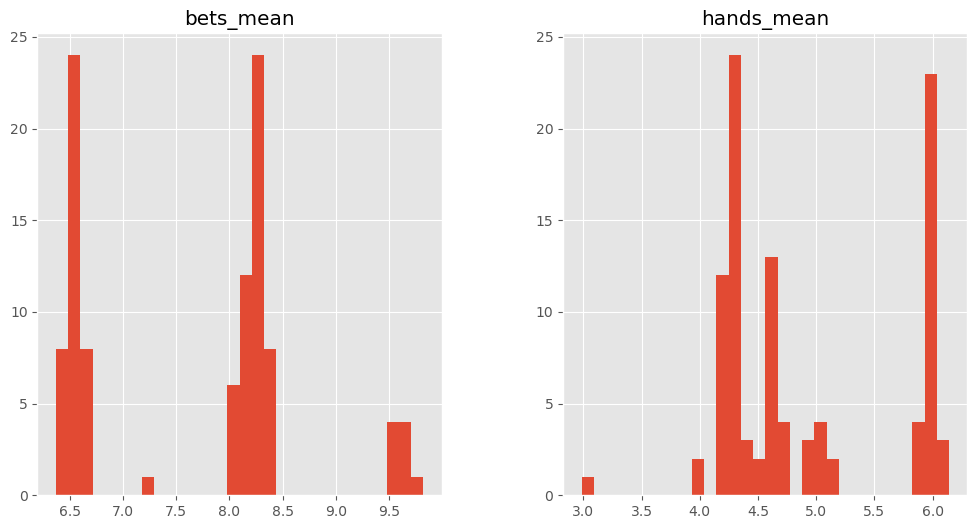

In [7]:
g = (
    pl_fig[['bets_mean', 'hands_mean']]
    .apply(lambda w: np.log(w + 1))
    .hist(figsize=(12,6), bins=30)
)

g;

In [8]:
import plotly.express as px

In [9]:
# !pip install plotly

In [11]:
# px.scatter_3d(
#     pl_fig,
#     x='res_sum',
#     y='bets_mean',
#     z='visits',
#     color='visits'
# ).show(renderer='browser')

In [13]:
px.scatter_3d(
    pl_fig,
    x='res_sum',
    y='bets_mean',
    z='visits',
    color='visits'
).show(renderer='iframe')

In [15]:
pl_fig['visits_quar'] = pd.qcut(pl_fig['visits'],4,['1','2','3','4'])
pl_fig['res_sum_quar'] = pd.qcut(pl_fig['res_sum'],4,['1','2','3','4'])
pl_fig['bets_mean_quar'] = pd.qcut(pl_fig['bets_mean'],4,['1','2','3','4'])

In [16]:
pl_fig

,id,visits,res_sum,res_std,res_mean,hands_sum,hands_std,hands_mean,bets_sum,bets_std,bets_mean,visits_quar,res_sum_quar,bets_mean_quar
0,520,5,93.225751,27.194432,18.645150,357.0,7.889233,71.40,3715.831390,82.115015,743.166278,1,3,2
1,266,5,-124.944832,90.646382,-24.988966,274.0,11.267653,54.80,2909.112290,119.630903,581.822458,1,3,1
2,526,2,81.132312,50.530011,40.566156,159.0,14.500000,79.50,1626.938609,148.368615,813.469305,1,3,2
3,785,4,1098.498073,285.729773,274.624518,380.0,7.382412,95.00,12998.479473,252.526644,3249.619868,1,4,2
4,786,4,-261.244285,114.909805,-65.311071,257.0,4.437060,64.25,2514.110771,43.405681,628.527693,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,497,8,771.752902,480.492798,96.469113,798.0,17.217360,99.75,28031.633305,604.800418,3503.954163,4,4,3
96,244,4,-213.094326,170.743689,-53.273581,278.0,13.901439,69.50,2765.249093,138.276766,691.312273,1,2,1
97,756,6,-983.709342,220.628491,-163.951557,2394.0,14.083087,399.00,23836.712143,140.223261,3972.785357,2,1,3
98,246,3,-316.254004,133.296633,-105.418001,1158.0,28.296054,386.00,11962.087399,292.296952,3987.362466,1,2,4


In [18]:
pl_fig['vrb']= pl_fig.visits_quar.astype(str) + pl_fig.res_sum_quar.astype(str)+pl_fig.bets_mean_quar.astype(str)

In [19]:
pl_fig

,id,visits,res_sum,res_std,res_mean,hands_sum,hands_std,hands_mean,bets_sum,bets_std,bets_mean,visits_quar,res_sum_quar,bets_mean_quar,vrb
0,520,5,93.225751,27.194432,18.645150,357.0,7.889233,71.40,3715.831390,82.115015,743.166278,1,3,2,132
1,266,5,-124.944832,90.646382,-24.988966,274.0,11.267653,54.80,2909.112290,119.630903,581.822458,1,3,1,131
2,526,2,81.132312,50.530011,40.566156,159.0,14.500000,79.50,1626.938609,148.368615,813.469305,1,3,2,132
3,785,4,1098.498073,285.729773,274.624518,380.0,7.382412,95.00,12998.479473,252.526644,3249.619868,1,4,2,142
4,786,4,-261.244285,114.909805,-65.311071,257.0,4.437060,64.25,2514.110771,43.405681,628.527693,1,2,1,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,497,8,771.752902,480.492798,96.469113,798.0,17.217360,99.75,28031.633305,604.800418,3503.954163,4,4,3,443
96,244,4,-213.094326,170.743689,-53.273581,278.0,13.901439,69.50,2765.249093,138.276766,691.312273,1,2,1,121
97,756,6,-983.709342,220.628491,-163.951557,2394.0,14.083087,399.00,23836.712143,140.223261,3972.785357,2,1,3,213
98,246,3,-316.254004,133.296633,-105.418001,1158.0,28.296054,386.00,11962.087399,292.296952,3987.362466,1,2,4,124


In [21]:
clusters = pl_fig['vrb'].value_counts()

In [23]:
good_cluster = clusters[clusters >=3].index.values

In [24]:
good_cluster

array(['132', '131', '124', '414', '214', '413', '143', '121', '213',
       '431', '442', '142'], dtype=object)

In [25]:
px.scatter_3d(
    pl_fig[pl_fig.vrb.isin(good_cluster)],
    x='res_sum',
    y='bets_mean',
    z='visits',
    color='vrb'
).show(renderer='iframe')